# Pigouvian tax and optimal transport

Using the Cobb-Douglas utility function, we know the consumer spends a fixed portion of their wealth on each product, which does not depend on price. Say $\omega$ is the consumer's wealth, $0 <= \alpha <= 1$ is the consumer's preference for the product, and $p$, $q$ are the prices of the product and the substitute. Then the consumer's demand for the product and substitute are respectively:

\begin{equation}
\tag{DN}
\frac{\omega \alpha}{p}
\label{eqn:DN}
\end{equation}

\begin{align*}
\frac{\omega (1 - \alpha)}{q}
\end{align*}

Suppose now a Pigouvian tax of size $t$ is imposed on the product. The price for the consumer increases to some price $p'$ and the consumer's demand for the product falls to $\frac{\omega \alpha}{p'}$. If the tax is redistributed, and the consumer spends again, and so on and so forth... the wealth of the consumer becomes:

$$
\omega' = \omega + \frac{\omega \alpha t}{p'} + \frac{\omega \alpha^2 t^2}{p'^2} + \dots = \omega \left ( \frac{1}{1 - \alpha \frac{t}{p'}} \right ) = \frac{\omega p'}{p' - \alpha t}
$$

The demand for the product is then

\begin{equation}
\tag{DR}
\frac{\omega \alpha}{p' - \alpha t}
\label{eqn:DR}
\end{equation}

And the fraction of the wealth attributed to the product remains $\alpha$. We wish to investigate the ratio of the post-tax demand to the pre-tax demand. We compute the ratio for the case when the tax isn't distributed and the case when the tax is distributed back. By \eqref{eqn:DN} and \eqref{eqn:DR}:

\begin{equation}
\tag{RN}
\frac{p}{p'}
\label{eqn:RN}
\end{equation}

\begin{equation}
\tag{RW}
\quad \frac{p}{p' - \alpha t}
\label{eqn:RW}
\end{equation}

Evidently distributing back the tax hurts its efficiency. The higher the preference of the user for the product, the higher redistributing affects the tax. So long as the condition $p' > p + \alpha t$ is respected, the redistributed tax reduces demand for the product.

To understand this ratio better, we can rewrite $p'$ by considering how demand and supply interact to give this new price. The equations we solve are of the form:

\begin{align*}
& \frac{\omega \alpha}{p} = s(p - t) \qquad \text{(no redistribution)} \\
& \frac{\omega \alpha}{p - \alpha t} = s(p - t) \qquad \text{(with redistribution)}
\end{align*}

where supply $s$ is a function of price. We study the case when the supply curve is linear: $s(p) = \beta p$. When there is no redistribution, we find:

\begin{align*}
                      & \frac{\omega \alpha}{p} = s(p - t) \\
\Leftrightarrow \quad & \frac{\omega \alpha}{\beta} = p (p - t) \\
\Leftrightarrow \quad & -p^2 + t p + \frac{\omega \alpha}{\beta} = 0 \\
\end{align*}

so that

$$
p = \frac{t + \sqrt{t^2 + 4 \frac{\omega \alpha}{\beta}}}{2} = \frac{t}{2} + \sqrt{\left ( \frac{t}{2} \right )^2 + \frac{\omega \alpha}{\beta}}
$$

Setting $t = 0$ gives the price with no tax. Similarly the no distribution case is:

$$
-p^2 + t(1 + \alpha)p + \left ( \frac{\omega \alpha}{\beta} - \alpha t^2 \right ) = 0
$$

and

$$
p = \frac{1}{2} (1 + \alpha) t + \sqrt{\frac{\omega \alpha}{\beta} + \left ( \frac{1 - \alpha}{2} t \right )^2}
$$

Substituting into \eqref{eqn:RN} and \eqref{eqn:RW}, both ratios take the form

$$
r(t) = \frac{\sqrt{l}}{f + \sqrt{l + f^2}}
$$

where $l = \frac{\omega \alpha}{\beta}$, $f = \frac{t}{2}$ in the no redistribution case, and $f = \frac{1 - \alpha}{2} t$ in the redistribution case. This form makes it clear how redistributing the Pigouvian tax affects its ability to reduce demand for a product in the case of Cobb-Douglas utility and a linear supply curve. The effect increases as $\alpha$ gets closer to $1$.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def ratio(w, a, b, t, redistribute=False):
    l = w * a / b

    f = 1 / 2 * t
    if redistribute:
        f = f * (1 - a)
    
    d = f + np.sqrt(l + f ** 2)
    return np.sqrt(l) / d


def price(w, a, b, t, redistribute=False):
    p = w * a / b

    if redistribute:
        return 1 / 2 * (1 + a) * t + np.sqrt(p + ((1 - a) * t / 2) ** 2)

    return t / 2 + np.sqrt(p + t ** 2 / 4)

In [107]:
w = 10
a = 0.8
b = 1
t = np.linspace(0, w, 30)

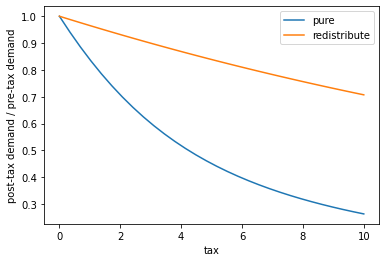

In [108]:
plt.plot(t, ratio(w, a, b, t), label="pure")
plt.plot(t, ratio(w, a, b, t, redistribute=True), label="redistribute")
plt.xlabel("tax")
plt.ylabel("post-tax demand / pre-tax demand")
plt.legend()

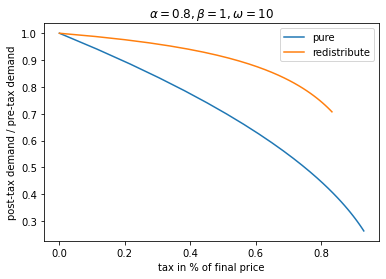

In [115]:
plt.plot(t / price(w, a, b, t), ratio(w, a, b, t), label="pure")
plt.plot(t / price(w, a, b, t, redistribute=True), ratio(w, a, b, t, redistribute=True), label="redistribute")

plt.xlabel("tax in % of final price")
plt.ylabel("post-tax demand / pre-tax demand")
plt.title(f"$\\alpha = {a}, \\beta = {1}, \\omega = {w}$")

plt.legend()

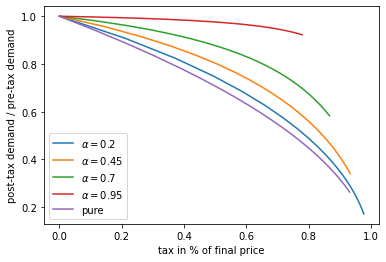

In [110]:
for na in np.linspace(0.2, 0.95, 4):
    plt.plot(t / price(w, na, b, t, redistribute=True), ratio(w, na, b, t, redistribute=True), label=f"$\\alpha = {round(na, 2)}$")

plt.xlabel("tax in % of final price")
plt.ylabel("post-tax demand / pre-tax demand")
plt.legend()